# Automating Crypto Website

In [23]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2175007b-04b0-489a-9ad0-1a11bbe59699',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-29T20:27:01.382Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 10123}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11335, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [27]:
import pandas as pd

In [29]:
type(data)

dict

In [35]:
pd.set_option('display.max_rows', None)

In [31]:
df = pd.json_normalize(data['data'])

In [33]:
df['timestamp'] = pd.to_datetime('now')

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971850e+07,1.971850e+07,False,NaN,1,NaN,NaN,None,2024-06-29T20:24:00.000Z,60959.992809,1.311385e+10,-47.0261,0.016534,1.249721,-5.163808,-10.776282,2.309326,-14.063184,1.202040e+12,53.3008,1.280160e+12,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201847e+08,1.201847e+08,True,NaN,2,NaN,NaN,None,2024-06-29T20:24:00.000Z,3382.832477,6.838147e+09,-46.0282,-0.050345,-0.043129,-3.112454,-9.381136,14.380211,-6.988102,4.065648e+11,18.0269,4.065648e+11,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
2,825,Tether USDt,USDT,tether,90409,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128115e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-06-29T20:24:00.000Z,0.998192,2.904044e+10,-40.4017,-0.013042,0.010828,-0.143480,-0.165916,-0.049090,-0.183943,1.126075e+11,4.9930,1.158670e+11,None,2024-06-29T20:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-29 13:27:17.502927
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,None,2024-06-29T20:24:00.000Z,571.188644,1.406491e+09,-11.9014,0.016389,0.136598,-2.726405,-3.763492,0.268395,-5.841354,8.429788e+10,3.7377,8.429788e+10,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.623566e+08,5.790682e+08,True,NaN,5,NaN,NaN,None,2024-06-29T20:24:00.000Z,141.435399,1.211662e+09,-49.5243,-0.229444,0.135193,5.311266,-15.505514,13.760838,-29.352393,6.539359e+10,2.8995,8.190075e+10,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
5,3408,USDC,USDC,usd-coin,20451,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.228321e+10,3.228321e+10,False,NaN,6,NaN,NaN,None,2024-06-29T20:24:00.000Z,0.999798,2.796118e+09,-51.5077,-0.006497,-0.009171,-0.022391,-0.025474,-0.027133,-0.014175,3.227670e+10,1.4311,3.227670e+10,None,2024-06-29T20:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-29 13:27:17.502927
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-06-29T20:25:00.000Z,0.473891,4.237904e+08,-54.3385,-0.086262,-0.017606,-2.675186,-8.759225,-5.180771,-24.573599,2.639017e+10,1.1701,4.738906e+10,None,2024-06-29T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459929e+09,5.108285e+09,True,NaN,8,3.414167e+09,2.611251e+10,None,2024-06-29T20:24:00.000Z,7.648283,1.609649e+08,-26.8029,-0.004652,2.492901,5.424768,18.378996,51.542235,42.245772,1.881424e+10,0.8342,3.906961e+10,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of

In [93]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
}
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2175007b-04b0-489a-9ad0-1a11bbe59699',
}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r"C:\Users\HP\Documents\Python Web Scraping\API.csv"):
        df.to_csv(r"C:\Users\HP\Documents\Python Web Scraping\API.csv", header='column_names')
    else:
        df.to_csv(r"C:\Users\HP\Documents\Python Web Scraping\API.csv", mode='a', header=False)

In [95]:
import os
from time import time
from time import sleep

for i in range(150):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) #sleep for one minute
exit()

{'status': {'timestamp': '2024-06-29T21:23:20.812Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 10123}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11335, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\HP\\Documents\\Python Web Scraping\\API.csv'

In [77]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971850e+07,1.971850e+07,False,NaN,1,NaN,NaN,None,2024-06-29T20:24:00.000Z,60959.992809,1.311385e+10,-47.0261,0.016534,1.249721,-5.163808,-10.776282,2.309326,-14.063184,1.202040e+12,53.3008,1.280160e+12,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201847e+08,1.201847e+08,True,NaN,2,NaN,NaN,None,2024-06-29T20:24:00.000Z,3382.832477,6.838147e+09,-46.0282,-0.050345,-0.043129,-3.112454,-9.381136,14.380211,-6.988102,4.065648e+11,18.0269,4.065648e+11,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
2,825,Tether USDt,USDT,tether,90409,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.128115e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-06-29T20:24:00.000Z,0.998192,2.904044e+10,-40.4017,-0.013042,0.010828,-0.143480,-0.165916,-0.049090,-0.183943,1.126075e+11,4.9930,1.158670e+11,None,2024-06-29T20:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-29 13:27:17.502927
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,None,2024-06-29T20:24:00.000Z,571.188644,1.406491e+09,-11.9014,0.016389,0.136598,-2.726405,-3.763492,0.268395,-5.841354,8.429788e+10,3.7377,8.429788e+10,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.623566e+08,5.790682e+08,True,NaN,5,NaN,NaN,None,2024-06-29T20:24:00.000Z,141.435399,1.211662e+09,-49.5243,-0.229444,0.135193,5.311266,-15.505514,13.760838,-29.352393,6.539359e+10,2.8995,8.190075e+10,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
5,3408,USDC,USDC,usd-coin,20451,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.228321e+10,3.228321e+10,False,NaN,6,NaN,NaN,None,2024-06-29T20:24:00.000Z,0.999798,2.796118e+09,-51.5077,-0.006497,-0.009171,-0.022391,-0.025474,-0.027133,-0.014175,3.227670e+10,1.4311,3.227670e+10,None,2024-06-29T20:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-29 13:27:17.502927
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,None,2024-06-29T20:25:00.000Z,0.473891,4.237904e+08,-54.3385,-0.086262,-0.017606,-2.675186,-8.759225,-5.180771,-24.573599,2.639017e+10,1.1701,4.738906e+10,None,2024-06-29T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.459929e+09,5.108285e+09,True,NaN,8,3.414167e+09,2.611251e+10,None,2024-06-29T20:24:00.000Z,7.648283,1.609649e+08,-26.8029,-0.004652,2.492901,5.424768,18.378996,51.542235,42.245772,1.881424e+10,0.8342,3.906961e+10,None,2024-06-29T20:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 13:27:17.502927
8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of

In [99]:
pd.read_csv(r"C:\Users\HP\Documents\Python Web Scraping\API.csv")

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.971851e+07,1.971851e+07,False,NaN,1,NaN,NaN,NaN,2024-06-29T21:21:00.000Z,60867.747559,1.285339e+10,-48.3376,-0.120079,1.107111,-5.315787,-10.962515,1.210813,-14.180715,1.200221e+12,53.2946,1.278223e+12,NaN,2024-06-29T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:23:20.693568
1,1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201847e+08,1.201847e+08,True,NaN,2,NaN,NaN,NaN,2024-06-29T21:21:00.000Z,3373.278931,6.762013e+09,-46.7123,-0.231676,-0.092213,-3.520323,-9.837511,13.169052,-7.192636,4.054166e+11,18.0018,4.054166e+11,NaN,2024-06-29T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:23:20.693568
2,2,825,Tether USDt,USDT,tether,90409,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.128115e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-06-29T21:21:00.000Z,0.998395,2.864373e+10,-41.3810,0.004616,0.007831,-0.128973,-0.151660,-0.019043,-0.166490,1.126304e+11,5.0012,1.158906e+11,NaN,2024-06-29T21:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-29 14:23:20.693568
3,3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475833e+08,1.475833e+08,False,NaN,4,NaN,NaN,NaN,2024-06-29T21:21:00.000Z,569.586709,1.386645e+09,-13.5960,-0.271896,0.504485,-3.208750,-4.055166,-1.395984,-6.303697,8.406146e+10,3.7326,8.406146e+10,NaN,2024-06-29T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:23:20.693568
4,4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.623563e+08,5.790680e+08,True,NaN,5,NaN,NaN,NaN,2024-06-29T21:21:00.000Z,140.576553,1.162729e+09,-51.4308,-0.638215,0.565446,4.770336,-15.710902,12.038922,-29.365052,6.499646e+10,2.8861,8.140338e+10,NaN,2024-06-29T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:23:20.693568
5,5,3408,USDC,USDC,usd-coin,20451,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.228140e+10,3.228140e+10,False,NaN,6,NaN,NaN,NaN,2024-06-29T21:21:00.000Z,0.999855,2.730620e+09,-52.5495,-0.003425,-0.023223,-0.019410,-0.018878,-0.014158,-0.015227,3.227672e+10,1.4339,3.227672e+10,NaN,2024-06-29T21:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-29 14:23:20.693568
6,6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.568833e+10,9.998749e+10,False,NaN,7,NaN,NaN,NaN,2024-06-29T21:22:00.000Z,0.472984,4.093413e+08,-56.3138,-0.150192,0.439467,-2.918466,-8.743988,-5.411888,-24.554663,2.633970e+10,1.1702,4.729843e+10,NaN,2024-06-29T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:23:20.693568
7,7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.459931e+09,5.108288e+09,True,NaN,8,3.414167e+09,2.614278e+10,NaN,2024-06-29T21:21:00.000Z,7.657147,1.594130e+08,-25.5655,0.151494,2.887345,5.343458,18.367916,50.505379,41.259015,1.883606e+10,0.8368,3.911491e+10,NaN,2024-06-29T21:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:23:20.693568
8,8,74,Dogecoin,DOGE,dogecoin,1015,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 

In [103]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [105]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11335,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19718506.00000,19718506.00000,False,NaN,1,NaN,NaN,None,2024-06-29T21:23:00.000Z,60873.83587,12836376550.63694,-48.42290,-0.12401,1.15004,-5.29525,-10.89717,1.23792,-14.16948,1200341097862.28345,53.32650,1278350553287.76001,None,2024-06-29T21:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:24:22.689076
1,1027,Ethereum,ETH,ethereum,9107,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120184718.66207,120184718.66207,True,NaN,2,NaN,NaN,None,2024-06-29T21:22:00.000Z,3373.87732,6761474851.03759,-46.71180,-0.21877,-0.04316,-3.48963,-9.80950,13.16129,-7.18911,405488497027.04761,18.01400,405488497027.04999,None,2024-06-29T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:24:22.689076
2,825,Tether USDt,USDT,tether,90409,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112811493077.39981,116076856618.75645,True,NaN,3,NaN,NaN,None,2024-06-29T21:22:00.000Z,0.99839,28639355815.69310,-41.38190,0.00161,0.02373,-0.12520,-0.15628,-0.01651,-0.16555,112630000967.78310,5.00360,115890111163.92000,None,2024-06-29T21:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-29 14:24:22.689076
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583251.70184,147583251.70184,False,NaN,4,NaN,NaN,None,2024-06-29T21:22:00.000Z,569.46596,1386645213.90310,-13.60200,-0.28809,0.55594,-3.22101,-4.11988,-1.51425,-6.35982,84043637925.41107,3.73370,84043637925.41000,None,2024-06-29T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:24:22.689076
4,5426,Solana,SOL,solana,695,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462356303.93643,579067968.32651,True,NaN,5,NaN,NaN,None,2024-06-29T21:22:00.000Z,140.44136,1162683266.41699,-51.42050,-0.67211,0.50985,4.69270,-15.81611,11.87669,-29.42459,64933946518.04155,2.88470,81325090986.10001,None,2024-06-29T21:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:24:22.689076
5,3408,USDC,USDC,usd-coin,20451,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32281396370.04756,32281396370.04756,False,NaN,6,NaN,NaN,None,2024-06-29T21:22:00.000Z,0.99985,2730393150.93803,-52.55240,-0.00631,-0.01225,-0.02343,-0.03342,-0.00849,-0.01032,32276715548.90663,1.43390,32276715548.91000,None,2024-06-29T21:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-29 14:24:22.689076
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-06-29T21:23:00.000Z,0.47297,407519390.12908,-56.54280,-0.16465,0.42610,-2.92393,-8.73774,-5.40625,-24.55795,26339097180.77501,1.17010,47297339181.16000,None,2024-06-29T21:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-29 14:24:22.689076
7,11419,Toncoin,TON,toncoin,443,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459931336.86332,5108287548.14029,True,NaN,8,3414166606.00000,26148186508.70301,None,2024-06-29T21:22:00.000Z,7.65873,159398241.09071,-25.56050,0.15940,2.93017,5.33243,18.40528,50.32846,41.12614,18839954465.56871,0.83700,39123004517.15000,No

In [131]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [133]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.12401,1.15004,-10.89717,1.23792,-14.16948
Ethereum,-0.21877,-0.04316,-9.80950,13.16129,-7.18911
Tether USDt,0.00161,0.02373,-0.15628,-0.01651,-0.16555
BNB,-0.28809,0.55594,-4.11988,-1.51425,-6.35982
Solana,-0.67211,0.50985,-15.81611,11.87669,-29.42459
USDC,-0.00631,-0.01225,-0.03342,-0.00849,-0.01032
XRP,-0.16465,0.42610,-8.73774,-5.40625,-24.55795
Toncoin,0.15940,2.93017,18.40528,50.32846,41.12614
Dogecoin,-0.56066,-0.77473,-23.23402,-7.79233,-44.94891


In [135]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.12401
             quote.USD.percent_change_24h     1.15004
             quote.USD.percent_change_30d   -10.89717
             quote.USD.percent_change_60d     1.23792
             quote.USD.percent_change_90d   -14.16948
Ethereum     quote.USD.percent_change_1h     -0.21877
             quote.USD.percent_change_24h    -0.04316
             quote.USD.percent_change_30d    -9.80950
             quote.USD.percent_change_60d    13.16129
             quote.USD.percent_change_90d    -7.18911
Tether USDt  quote.USD.percent_change_1h      0.00161
             quote.USD.percent_change_24h     0.02373
             quote.USD.percent_change_30d    -0.15628
             quote.USD.percent_change_60d    -0.01651
             quote.USD.percent_change_90d    -0.16555
BNB          quote.USD.percent_change_1h     -0.28809
             quote.USD.percent_change_24h     0.55594
             quote.USD.percent_change_30

In [119]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [125]:
type(df4)

pandas.core.series.Series

In [137]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.12401
            quote.USD.percent_change_24h   1.15004
            quote.USD.percent_change_30d -10.89717
            quote.USD.percent_change_60d   1.23792
            quote.USD.percent_change_90d -14.16948
Ethereum    quote.USD.percent_change_1h   -0.21877
            quote.USD.percent_change_24h  -0.04316
            quote.USD.percent_change_30d  -9.80950
            quote.USD.percent_change_60d  13.16129
            quote.USD.percent_change_90d  -7.18911
Tether USDt quote.USD.percent_change_1h    0.00161
            quote.USD.percent_change_24h   0.02373
            quote.USD.percent_change_30d  -0.15628
            quote.USD.percent_change_60d  -0.01651
            quote.USD.percent_change_90d  -0.16555
BNB         quote.USD.percent_change_1h   -0.28809
            quote.USD.percent_change_24h   0.55594
            quote.USD.percent_change_30d  -4.11988
            quote.USD.percent_change_60d  -1.51425
            quote.USD.percent_change_90d  -6.35982
Solana      quote.USD.percent_change_1h   -0.67211
            quote.USD.percent_change_24h   0.50985
            quote.USD.percent_change_30d -15.81611
            quote.USD.percent_change_60d  11.87669
            quote.USD.percent_change_90d -29.42459
USDC        quote.USD.percent_change_1h   -0.00631
            quote.USD.percent_change_24h  -0.01225
            quote.USD.percent_change_30d  -0.03342
            quote.USD.percent_change_60d  -0.00849
            quote.USD.percent_change_90d  -0.01032
XRP         quote.USD.percent_change_1h   -0.16465
            quote.USD.percent_change_24h   0.42610
            quote.USD.percent_change_30d  -8.73774
            quote.USD.percent_change_60d  -5.40625
            quote.USD.percent_change_90d -24.55795
Toncoin     quote.USD.percent_change_1h    0.15940
            quote.USD.percent_change_24h   2.93017
            quote.USD.percent_change_30d  18.40528
            quote.USD.percent_change_60d  50.32846
            quote.USD.percent_change_90d  41.12614
Dogecoin    quote.USD.percent_change_1h   -0.56066
            quote.USD.percent_change_24h  -0.77473
            quote.USD.percent_change_30d -23.23402
            quote.USD.percent_change_60d  -7.79233
            quote.USD.percent_change_90d -44.94891
Cardano     quote.USD.percent_change_1h   -0.19693
            quote.USD.percent_change_24h  -0.07220
            quote.USD.percent_change_30d -13.32893
            quote.USD.percent_change_60d -12.16779
            quote.USD.percent_change_90d -40.32518
TRON        quote.USD.percent_change_1h    0.00952
            quote.USD.percent_change_24h   2.01317
            quote.USD.percent_change_30d  12.46495
            quote.USD.percent_change_60d   5.61216
            quote.USD.percent_change_90d   2.42328
Avalanche   quote.USD.percent_change_1h   -0.30618
            quote.USD.percent_change_24h  -0.37382
            quote.USD.percent_change_30d -22.91017
            quote.USD.percent_change_60d -14.37498
            quote.USD.percent_change_90d -48.43148
Shiba Inu   quote.USD.percent_change_1h   -0.52293
            quote.USD.percent_change_24h   0.79500
            quote.USD.percent_change_30d -34.20386
            quote.USD.percent_change_60d -23.73176
            quote.USD.percent_change_90d -44.53098
Polkadot    quote.USD.percent_change_1h   -0.14567
            quote.USD.percent_change_24h  -1.53809
            quote.USD.percent_change_30d -12.87747
            quote.USD.percent_change_60d  -1.80186
            quote.USD.percent_change_90d -36.29198
Chainlink   quote.USD.percent_change_1h   -0.62703
            quote.USD.percent_change_24h  -2.71204
            quote.USD.percent_change_30d -23.96829
            quote.USD.percent_change_60d   3.71989
            quote.USD.percent_change_90d -28.72409

In [139]:
df5.count()

values    75
dtype: int64

In [145]:
index = pd.Index(range(75))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12401
1,Bitcoin,quote.USD.percent_change_24h,1.15004
2,Bitcoin,quote.USD.percent_change_30d,-10.89717
3,Bitcoin,quote.USD.percent_change_60d,1.23792
4,Bitcoin,quote.USD.percent_change_90d,-14.16948
5,Ethereum,quote.USD.percent_change_1h,-0.21877
6,Ethereum,quote.USD.percent_change_24h,-0.04316
7,Ethereum,quote.USD.percent_change_30d,-9.80950
8,Ethereum,quote.USD.percent_change_60d,13.16129
9,Ethereum,quote.USD.percent_change_90d,-7.18911


In [149]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12401
1,Bitcoin,quote.USD.percent_change_24h,1.15004
2,Bitcoin,quote.USD.percent_change_30d,-10.89717
3,Bitcoin,quote.USD.percent_change_60d,1.23792
4,Bitcoin,quote.USD.percent_change_90d,-14.16948
5,Ethereum,quote.USD.percent_change_1h,-0.21877
6,Ethereum,quote.USD.percent_change_24h,-0.04316
7,Ethereum,quote.USD.percent_change_30d,-9.80950
8,Ethereum,quote.USD.percent_change_60d,13.16129
9,Ethereum,quote.USD.percent_change_90d,-7.18911


In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

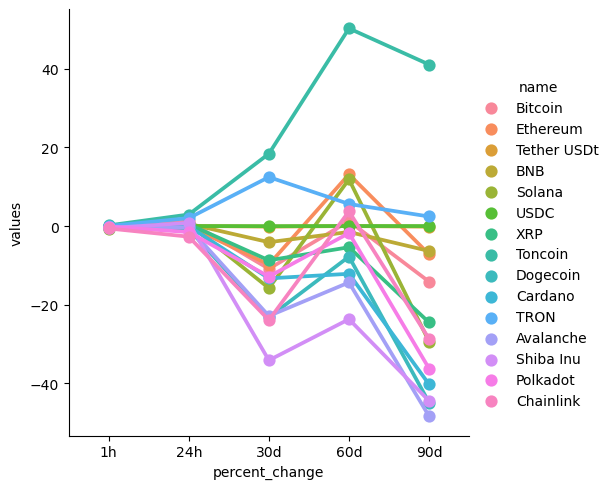

In [175]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [173]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12401
1,Bitcoin,24h,1.15004
2,Bitcoin,30d,-10.89717
3,Bitcoin,60d,1.23792
4,Bitcoin,90d,-14.16948
5,Ethereum,1h,-0.21877
6,Ethereum,24h,-0.04316
7,Ethereum,30d,-9.80950
8,Ethereum,60d,13.16129
9,Ethereum,90d,-7.18911


In [183]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60873.83587,2024-06-29 14:24:22.689076


In [181]:
pd.set_option('display.max_rows', None)